In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import scipy as sc
# from scipy.sparse import csr_matrix
from scipy import misc
#import pandas as pd

# Load code

In [31]:
text_data = np.load("text.npy", allow_pickle=False)
text_data  # (doc_id, word_id, count)

array([['1', '4720', '1'],
       ['1', '9775', '4'],
       ['1', '19996', '1'],
       ..., 
       ['72406', '12843', '1'],
       ['72406', '10666', '1'],
       ['72406', '19430', '1']], 
      dtype='|S6')

In [45]:
print text_data.shape[0]

5224951


In [42]:
doc_ids = list(set([int(item) for item in text_data[:,0]]))
print len(doc_ids)
print max(doc_ids)

72406
72406


In [43]:
word_ids = list(set([int(item) for item in text_data[:,1]]))
print len(word_ids)
print max(word_ids)  # maximum number is 30783, but some are missing

23665
30783


In [46]:
import sys

In [54]:
# we assume if there happens to be two counts for the same (doc, word)
# we choose the one later in the list to store (overwrites earlier values)
D = len(doc_ids)
V = len(word_ids)

# construct D x V array of counts (# make 0-indexed)
counts = np.zeros((D, V))

L = text_data.shape[0]

for row in xrange(L):
    if row % 10000 == 0:
        print "completed %i iterations of %i" % (row, L)
    counts[int(text_data[row][0]) - 1, 
           word_ids.index(int(text_data[row][1]))] = int(text_data[row][2])

completed 0 iterations of 5224951
completed 10000 iterations of 5224951
completed 20000 iterations of 5224951
completed 30000 iterations of 5224951
completed 40000 iterations of 5224951
completed 50000 iterations of 5224951
completed 60000 iterations of 5224951
completed 70000 iterations of 5224951
completed 80000 iterations of 5224951
completed 90000 iterations of 5224951
completed 100000 iterations of 5224951
completed 110000 iterations of 5224951
completed 120000 iterations of 5224951
completed 130000 iterations of 5224951
completed 140000 iterations of 5224951
completed 150000 iterations of 5224951
completed 160000 iterations of 5224951
completed 170000 iterations of 5224951
completed 180000 iterations of 5224951
completed 190000 iterations of 5224951
completed 200000 iterations of 5224951
completed 210000 iterations of 5224951
completed 220000 iterations of 5224951
completed 230000 iterations of 5224951
completed 240000 iterations of 5224951
completed 250000 iterations of 5224951


In [86]:
counts

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [88]:
text_data = None

## Implement algorithm

In [197]:
# initialize parameters

K = 15
# theta: proportion of topic k across all documents (vector, length K)
theta = np.random.dirichlet(np.ones(K))
# beta_k: for the kth topic, beta_k is the probability of seeing the v'th word across
# all V possible words in the vocabulary (array, K x V)
beta_k = np.random.dirichlet(np.ones(V), size=K) 

In [80]:
theta

array([ 0.054282  ,  0.00873004,  0.22233087,  0.25866442,  0.03409142,
        0.01135673,  0.13264478,  0.10018084,  0.06529203,  0.11242687])

In [85]:
beta_k

array([[  2.92026397e-05,   1.20505313e-04,   9.49836702e-05, ...,
          5.41011208e-06,   2.83781377e-05,   1.65346118e-04],
       [  2.34596955e-05,   2.78071399e-05,   1.37492597e-05, ...,
          6.99308233e-06,   1.33386856e-05,   8.97354691e-06],
       [  6.06554789e-05,   1.19787687e-05,   2.61253794e-05, ...,
          6.66515947e-06,   1.22376594e-05,   9.43460789e-06],
       ..., 
       [  2.06624696e-06,   8.04538803e-06,   9.87541569e-06, ...,
          1.23770488e-05,   1.57926584e-05,   6.22865096e-05],
       [  5.67060400e-06,   6.01697556e-05,   6.45290886e-05, ...,
          6.41898379e-06,   2.55552634e-06,   2.03176207e-05],
       [  1.20050125e-06,   3.21899187e-05,   2.88742929e-05, ...,
          2.75514893e-05,   4.92722486e-05,   4.20376121e-05]])

In [84]:
beta_k.shape

(10, 23665)

In [92]:
np.log(1e-08)

-18.420680743952367

In [99]:
np.tile(theta, (D, 1)).shape

(72406, 10)

In [103]:
np.log(beta_k + 1e-10).T.shape

(23665, 10)

In [105]:
counts.shape

(72406, 23665)

In [108]:
w = counts
np.dot(w, np.log(beta_k + 1e-10).T).shape

(72406, 10)

In [110]:
gamma = np.dot(w, np.log(beta_k + 1e-10).T) + np.tile(np.log(theta), (D, 1))
np.sum(gamma[0])

-10582.440381658063

In [111]:
gamma.shape

(72406, 10)

In [112]:
gamma

array([[-1110.66354951, -1062.44839131, -1046.24183711, ...,
        -1075.78416869, -1041.17656004, -1041.57265023],
       [-1872.81725063, -1870.52357148, -1822.40422547, ...,
        -1863.16881621, -1865.86576657, -1823.7431907 ],
       [-1195.7295482 , -1197.9975634 , -1194.10159116, ...,
        -1190.61590318, -1184.79091129, -1185.65705744],
       ..., 
       [-3430.25685602, -3345.11340347, -3409.5385076 , ...,
        -3358.70617479, -3382.39622114, -3382.11930729],
       [-1817.14423348, -1789.68223211, -1781.98976129, ...,
        -1817.98040116, -1797.8545889 , -1739.83291892],
       [-1883.95824003, -1915.98899836, -1883.64696624, ...,
        -1927.22323922, -1930.98609375, -1915.36174568]])

In [113]:
np.apply_along_axis(misc.logsumexp, 1, gamma)

array([-1026.60813569, -1822.17143519, -1178.0437056 , ..., -3302.42783878,
       -1734.63049649, -1883.09739311])

In [114]:
np.apply_along_axis(misc.logsumexp, 1, gamma).shape

(72406,)

In [120]:
sums = np.apply_along_axis(misc.logsumexp, 1, gamma, keepdims=True)
np.sum(np.exp(gamma - sums))

72406.0

In [121]:
np.isclose(D, np.sum(np.exp(gamma - sums)))

True

In [131]:
gamma.shape

(72406, 10)

In [132]:
sums.shape

(72406, 1)

In [133]:
gamma[0]

array([-1110.66683685, -1062.45067206, -1046.24281411, -1033.13344138,
       -1084.13505756, -1060.67928606, -1026.61037274, -1075.78648678,
       -1041.17752302, -1041.57334026])

In [134]:
sums[0]

array([-1026.60813569])

In [135]:
gamma[0] - sums[0]

array([ -8.40587012e+01,  -3.58425364e+01,  -1.96346784e+01,
        -6.52530568e+00,  -5.75269219e+01,  -3.40711504e+01,
        -2.23704586e-03,  -4.91783511e+01,  -1.45693873e+01,
        -1.49652046e+01])

In [122]:
np.exp(gamma - sums)

array([[  3.12750205e-37,   2.72128957e-16,   2.97297883e-09, ...,
          4.39663313e-22,   4.70992181e-07,   3.16952303e-07],
       [  1.01111796e-22,   1.00215298e-21,   7.92319722e-01, ...,
          1.56698071e-18,   1.05631390e-19,   2.07680278e-01],
       [  2.08514446e-08,   2.15848811e-09,   1.06205965e-07, ...,
          3.46708081e-06,   1.17415599e-03,   4.93813893e-04],
       ..., 
       [  3.05185002e-56,   2.89664183e-19,   3.03687962e-47, ...,
          3.61933863e-25,   1.86282823e-35,   2.45716868e-35],
       [  1.46129987e-36,   1.23405639e-24,   2.70478427e-21, ...,
          6.33280824e-37,   3.48438026e-28,   5.50321709e-03],
       [  4.22803850e-01,   5.19227085e-15,   5.77196150e-01, ...,
          6.86101750e-20,   1.59294789e-21,   9.72231565e-15]])

In [128]:
np.log(1e-100)

-230.25850929940458

In [136]:
logsums = np.apply_along_axis(misc.logsumexp, 1, gamma)  # by row

In [142]:
gamma

array([[-1110.66683685, -1062.45067206, -1046.24281411, ...,
        -1075.78648678, -1041.17752302, -1041.57334026],
       [-1872.8207448 , -1870.52791649, -1822.40557736, ...,
        -1863.17138778, -1865.8801321 , -1823.74501378],
       [-1195.73355656, -1197.99877522, -1194.10273464, ...,
        -1190.61722302, -1184.79208032, -1185.65810793],
       ..., 
       [-3430.26422921, -3345.11955782, -3409.54760709, ...,
        -3358.71119018, -3382.4020054 , -3382.12256831],
       [-1817.14707329, -1789.68456016, -1781.99187774, ...,
        -1817.98496   , -1797.85723432, -1739.83414279],
       [-1883.96053356, -1915.99253223, -1883.64922051, ...,
        -1927.22671579, -1930.99449368, -1915.36507631]])

In [143]:
logsums

array([-1026.60890387, -1822.17288492, -1178.04465214, ..., -3302.4317077 ,
       -1734.63533407, -1883.09966398])

In [141]:
gamma - logsums[:, np.newaxis]

array([[ -84.05793298,  -35.84176819,  -19.63391024, ...,  -49.17758291,
         -14.56861915,  -14.96443638],
       [ -50.64785988,  -48.35503157,   -0.23269244, ...,  -40.99850285,
         -43.70724718,   -1.57212886],
       [ -17.68890442,  -19.95412307,  -16.05808249, ...,  -12.57257087,
          -6.74742818,   -7.61345579],
       ..., 
       [-127.83252151,  -42.68785012, -107.11589939, ...,  -56.27948248,
         -79.9702977 ,  -79.69086061],
       [ -82.51173923,  -55.04922609,  -47.35654367, ...,  -83.34962594,
         -63.22190026,   -5.19880873],
       [  -0.86086958,  -32.89286825,   -0.54955652, ...,  -44.1270518 ,
         -47.89482969,  -32.26541232]])

In [162]:
def neg_log_like(currg, currw, currbeta, currtheta):
    # to sum over all indices in a triple sum of a product, we can calculate the
    # dot product of the matrix elements and then sum only the diagonal elements
    # https://en.wikipedia.org/wiki/Trace_(linear_algebra)
    # gamma is D x K, w is D x V, beta_k is K x V, theta is K x 1
    
    term1 = np.sum(np.diagonal(np.dot(currg.T, np.dot(currw, np.log(currbeta + 1e-100).T))))
    term2 = np.sum(np.dot(currg, np.log(currtheta + 1e-100)))
    
    return -1.0 * (term1 + term2)

In [156]:
a = np.array([[1, 2, 3], [4, 5, 6]])  # 2 x 3
b = np.array([[5, 6, 7, 8], [9, 10, 11, 12]])  # 2 x 4
c = np.array([[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]])  # 3 x 4

sum = 0
for i in range(2):
    for j in range(3):
        for k in range(4):
            sum += a[i, j] * b[i, k] * c[j, k]
            
print "loop", sum
print np.sum(np.dot(np.dot(a, c), b.T))  
print np.sum(np.dot(np.dot(b, c.T), a.T)) 
print np.sum(np.diag(np.dot(np.dot(b, c.T), a.T)))

loop 15190
27716
27716
15190


In [157]:
d = np.array([1, 2, 3, 4])

sum = 0 
for i in range(3):
    for j in range(4):
        sum += c[i, j] * d[j]

print "loop", sum

print np.sum(np.dot(c, d.T))

loop 570
570


In [198]:
max_iters = 100  # maximum iteration
beta_trace = [beta_k]
obj_function = []

for i in xrange(max_iters):
    
    print "beginning iteration", i; sys.stdout.flush()

    # E Step
    # Evaluate posterior distribution for Z
    # gamma is a D x K matrix: probabilities that words of document d belongs to topic k
    # Note: theta is a constant, distribution applies to each document

    w = counts
    gamma = np.dot(w, np.log(beta_k + 1e-100).T) + np.tile(np.log(theta + 1e-100), (D, 1))

    # normalize the rows, convert into probabilities
    logsums = np.apply_along_axis(misc.logsumexp, 1, gamma)  # by row
    gamma = np.exp(gamma - logsums[:, np.newaxis])  # subtract log for row, and re-exponentiate
    # assert np.isclose(np.sum(gamma), D)  # D rows add up to 1

    # M Step
    # Get new values for theta and beta_k
    # Recall:
    #   theta: proportion of topic k across all documents (vector, length K)
    #   beta_k: for the kth topic, beta_k is the probability of seeing the v'th word across
    #     all V possible words in the vocabulary (array, K x V)

    theta = np.mean(gamma, axis=0) # mean over columns

    old_beta_k = beta_k  # remember old beta
    temp = np.dot(gamma.T, w)
    row_sums = temp.sum(axis=1, keepdims=True)
    beta_k = temp * 1.0 / row_sums # normalized dot product

    # Stopping Criterion
    # Since we are most interested in beta_k, we see if beta_k stops changing
    # if so, we terminate; otherwise, loop

    beta_trace.append(beta_k)
    Q = neg_log_like(gamma, w, beta_k, theta)
    obj_function.append(Q)  # negative log likelihood
    
    if np.allclose(old_beta_k, beta_k, atol=1e-05):
        print "convergence"
        break
    else:
        print Q
        # endloop

beginning iteration 0
56940679.2687
beginning iteration 1
55720757.7757
beginning iteration 2
54699591.2094
beginning iteration 3
54287392.6727
beginning iteration 4
54114981.8194
beginning iteration 5
54038745.0054
beginning iteration 6
54001399.2726
beginning iteration 7
53982268.4702
beginning iteration 8
53970922.3015
beginning iteration 9
53964052.5834
beginning iteration 10
53958750.6124
beginning iteration 11
53954640.2132
beginning iteration 12
53952496.6149
beginning iteration 13
53950153.2167
beginning iteration 14
53948740.1761
beginning iteration 15
53947356.0231
beginning iteration 16
53946227.2282
beginning iteration 17
53945589.4388
beginning iteration 18
53944790.4733
beginning iteration 19
53944216.5618
beginning iteration 20
53943581.607
beginning iteration 21
53943015.5008
beginning iteration 22
53942521.0188
beginning iteration 23
53941982.9499
beginning iteration 24
53941664.9188
beginning iteration 25
53941402.6302
beginning iteration 26
53941172.6031
beginning it

In [193]:
%matplotlib inline

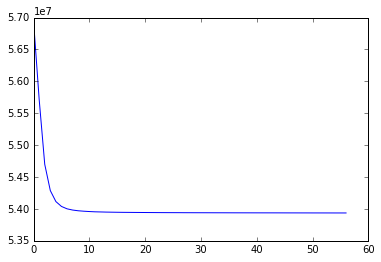

In [199]:
plt.plot(obj_function)

In [200]:
beta_k

array([[  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  5.88436460e-143,   8.38748999e-294,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   7.59346071e-006],
       [  1.83341406e-006,   0.00000000e+000,   4.94065646e-324, ...,
          0.00000000e+000,   1.83341406e-006,   3.85016952e-005],
       ..., 
       [  4.94622419e-006,   3.58992381e-233,   0.00000000e+000, ...,
          0.00000000e+000,   1.23514770e-006,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   3.55496280e-005,   0.00000000e+000],
       [  8.08334967e-006,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   4.04167472e-006,   0.00000000e+000]])

In [167]:
beta_trace

[array([[  1.19967820e-005,   0.00000000e+000,   0.00000000e+000, ...,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        [  3.08635225e-019,   2.43548199e-006,   0.00000000e+000, ...,
           0.00000000e+000,   0.00000000e+000,   3.16612659e-005],
        [  2.07471147e-005,   2.59338934e-006,   1.72892623e-006, ...,
           4.70343679e-210,   0.00000000e+000,   2.59338934e-006],
        ..., 
        [  3.05842103e-006,   5.43610176e-216,   4.94065646e-324, ...,
           4.73329786e-198,   0.00000000e+000,   1.52921051e-005],
        [  2.34686173e-006,   9.16833043e-127,   1.63003753e-292, ...,
           2.34686172e-006,   2.56141000e-232,   2.34686172e-006],
        [  5.53988719e-006,   2.05616026e-218,   1.53153448e-254, ...,
           1.38497180e-006,   0.00000000e+000,   0.00000000e+000]]),
 array([[  1.19777671e-005,   0.00000000e+000,   0.00000000e+000, ...,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        [  2.45013

### Get ID to word conversion

In [168]:
with open('words.txt', 'r') as f:
    word_dict_lines = f.readlines()

In [169]:
word_dict_lines

['1 aa\n',
 '2 aaa\n',
 '3 aaai\n',
 '4 aachen\n',
 '5 aal\n',
 '6 aalborg\n',
 '7 aam\n',
 '8 aann\n',
 '9 aapc\n',
 '10 aardal\n',
 '11 aarhus\n',
 '12 aaron\n',
 '13 aas\n',
 '14 aasert\n',
 '15 aaw\n',
 '16 ab\n',
 '17 abacus\n',
 '18 abadi\n',
 '19 abandon\n',
 '20 abandoned\n',
 '21 abandoning\n',
 '22 abandonment\n',
 '23 abandons\n',
 '24 abatement\n',
 '25 abb\n',
 '26 abbot\n',
 '27 abbreviated\n',
 '28 abbreviation\n',
 '29 abbreviations\n',
 '30 abc\n',
 '31 abcd\n',
 '32 abcl\n',
 '33 abd\n',
 '34 abdominal\n',
 '35 abducibles\n',
 '36 abduction\n',
 '37 abductive\n',
 '38 abe\n',
 '39 abel\n',
 '40 abelian\n',
 '41 abelson\n',
 '42 aber\n',
 '43 aberration\n',
 '44 aberrations\n',
 '45 abf\n',
 '46 abilities\n',
 '47 ability\n',
 '48 abiteboul\n',
 '49 abl\n',
 '50 ablation\n',
 '51 abnormal\n',
 '52 abnormalities\n',
 '53 abnormality\n',
 '54 aboard\n',
 '55 abord\n',
 '56 abort\n',
 '57 aborted\n',
 '58 aborting\n',
 '59 abortion\n',
 '60 aborts\n',
 '61 abound\n',
 '62

In [184]:
word = {}

for line in word_dict_lines: 
    id_word = line.split()
    
    try:
        word[int(id_word[0])] = id_word[1]
    except:
        print "error", id_word

In [185]:
word.items()

[(1, 'aa'),
 (2, 'aaa'),
 (3, 'aaai'),
 (4, 'aachen'),
 (5, 'aal'),
 (6, 'aalborg'),
 (7, 'aam'),
 (8, 'aann'),
 (9, 'aapc'),
 (10, 'aardal'),
 (11, 'aarhus'),
 (12, 'aaron'),
 (13, 'aas'),
 (14, 'aasert'),
 (15, 'aaw'),
 (16, 'ab'),
 (17, 'abacus'),
 (18, 'abadi'),
 (19, 'abandon'),
 (20, 'abandoned'),
 (21, 'abandoning'),
 (22, 'abandonment'),
 (23, 'abandons'),
 (24, 'abatement'),
 (25, 'abb'),
 (26, 'abbot'),
 (27, 'abbreviated'),
 (28, 'abbreviation'),
 (29, 'abbreviations'),
 (30, 'abc'),
 (31, 'abcd'),
 (32, 'abcl'),
 (33, 'abd'),
 (34, 'abdominal'),
 (35, 'abducibles'),
 (36, 'abduction'),
 (37, 'abductive'),
 (38, 'abe'),
 (39, 'abel'),
 (40, 'abelian'),
 (41, 'abelson'),
 (42, 'aber'),
 (43, 'aberration'),
 (44, 'aberrations'),
 (45, 'abf'),
 (46, 'abilities'),
 (47, 'ability'),
 (48, 'abiteboul'),
 (49, 'abl'),
 (50, 'ablation'),
 (51, 'abnormal'),
 (52, 'abnormalities'),
 (53, 'abnormality'),
 (54, 'aboard'),
 (55, 'abord'),
 (56, 'abort'),
 (57, 'aborted'),
 (58, 'aborting

In [172]:
len(word)

30799

## get topics

In [180]:
np.argsort(beta_k[0])[::-1][:wpt]

array([16694,  2958,  2959, 16695,  8653, 17942,  8687, 13413,  6108,
       20408, 19866,  8480, 21029,  7562,  5577])

In [201]:
wpt = 15 # number of words per topic to print

for k in xrange(K):
    print "topic", k
    # reverse sort, get actually id and print word
    print [word[word_ids[idx]] for idx in np.argsort(beta_k[k])[::-1][:wpt]]

topic 0
['study', 'mantle', 'data', 'project', 'rocks', 'results', 'research', 'processes', 'models', 'crust', 'provide', 'studies', 'evolution', 'seismic', 'work']
topic 1
['protein', 'gene', 'dna', 'research', 'genes', 'molecular', 'proteins', 'cell', 'expression', 'plant', 'biology', 'studies', 'analysis', 'rna', 'specific']
topic 2
['research', 'data', 'project', 'study', 'ocean', 'provide', 'support', 'university', 'water', 'program', 'time', 'work', 'system', 'important', 'ice']
topic 3
['research', 'project', 'data', 'study', 'social', 'information', 'important', 'time', 'models', 'support', 'months', 'economic', 'understanding', 'model', 'development']
topic 4
['species', 'research', 'study', 'plant', 'project', 'studies', 'populations', 'important', 'understanding', 'effects', 'plants', 'growth', 'provide', 'determine', 'population']
topic 5
['research', 'materials', 'high', 'project', 'phase', 'properties', 'optical', 'system', 'process', 'applications', 'devices', 'developme